In [1]:
# encoding=utf8

# Linear Regression Analysis


An analysis of different regression methods in python. 

+ Linear Regression
+ Logistic Regression

In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Regression with one variable

First, we need to read and store data.

In [3]:
data = np.genfromtxt('../../DataSets/pybk015master/ex1data1', delimiter=',')
x = data[:,[0]]
y = data[:,[1]]

### Data Visualization

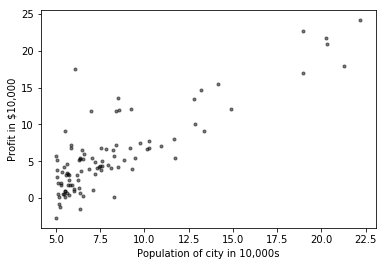

In [4]:
area   = np.pi*3
colors = (0,0,0)

plt.close('all')

plt.scatter(x,y,s=area,c=colors,alpha=0.5)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')

plt.show()

### The Cost Function

The Cost Function is used to represent a linear expression that best represents a hypothesis for the data under study. The parameter θ takes values so that the function J (θ) is minimized by approaching the values ​​obtained with the reference values in y.

In [5]:
def cost_function(x, y, theta):
    m = y.size
    regression = x.dot(theta)
    regressionError = np.sum((regression - y)**2)
    return ((1./(2*m))*regressionError)

For the data under study, the cost function should return an approximate value of 32,072 for the initial values of θ. Let's test the function return to θ at zero

In [6]:
' Update y in order to perform good matrices operations '
y = data[:,1]
' Insert ones in order to perform good matrices operations '
x = np.insert(x, 0, np.ones(x.size), axis=1)
theta = np.array([0., 0.])
cost_function(x,y,theta)

32.072733877455676

### Gradient Descent

In order to find the better fit for our prediction model, lets implement the Gradient Descent algorithm and minimize our J(θ). We will perform little steps across theta values and control the convergence, in order to ensure  that the final θ are what we are looking for.

In [7]:
def gradient_descent(x, y, theta, alpha, tolerance, log = False):
    m = y.size
    episilon  = 0.000001
    residual  = np.ones(tolerance)
    interact = 0
    converge = False
    while not converge:
        ' step 1 : Start adjusting theta values '
        hypothesis   = x.dot(theta)
        error        = (hypothesis - y)
        gradient     = (1./m) * (alpha) * (x.T.dot(error))
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' step 2 : Run the cost function over the data with new theta '
        residual[interact] = cost_function(x, y, theta)
        
        if interact % 100 == 0 and log:
            print('Interaction ' + str(interact) + ' - Residual cost '+ str(residual[interact]))
        
        ' step 3 : Verify convergence over the given episilon and residual given step, also verify tolerance tries '
        
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        if (interact + 1) == tolerance:
            print('Caution! GD has reached the tolerance. Results may not converge.')
            converge = True
            
        interact = interact + 1
        
    return theta, residual, interact

In [8]:
(t,r,i) = gradient_descent(x, y, theta, 0.01, 4000)

print('Last interaction was '+ str(i) + ' and the output for θ is: ')
print(t)

Caution! GD has reached the tolerance. Results may not converge.
Last interaction was 4000 and the output for θ is: 
[-3.89286253  1.19274046]


The α component of the Gradient Descent is a scalar used to regulate the learning rate. It can be interpreted as the "step size" that will be given by the gradient vector. The higher the α, the more aggressive the learning rate.

Our test has reached the maximum number of attempts. We can conclude that the definition of the value for parameter α plays an important role in the convergence of our algorithm.

We still need to make sure that our task is performing as expected. So, we can plot the error rate behavior and ensure that it decreases when reaching the max interation. We can conlude that 0.01 lead us for the max execution and is not a good choice for α.

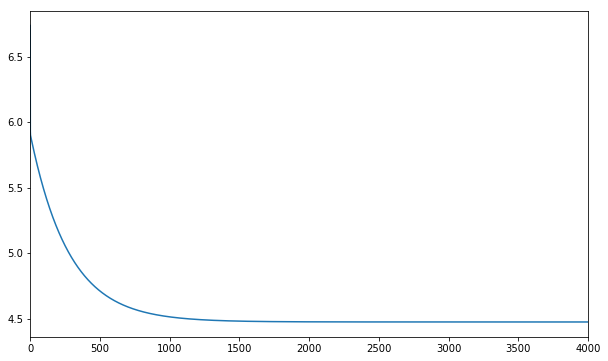

In [9]:
plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(r)

plt.show()

### How to use the model and perform a prediction

Using the obtained model to perform a prediction is a very easy task when working with one variable linear regression. We will use matrice operations to obtain the prediction values for cities with 35.000 and 70.000 population

In [10]:
' Predicting values for 35.000 population '
p = np.array([1., 35.000]).dot(t)
print('Predicting values for 35.000 population : ' + str(p))

' Predicting values for 70.000 population '
p = np.array([1., 70.000]).dot(t)
print('Predicting values for 35.000 population : ' + str(p))

Predicting values for 35.000 population : 37.8530537174
Predicting values for 35.000 population : 79.5989699615


### Regression Line

Finally we can evaluate if the obtained model has a good fit to the data.

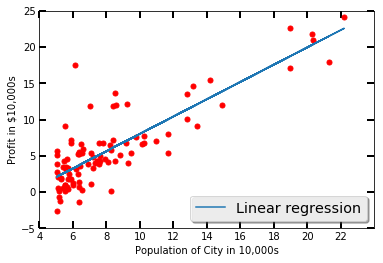

In [11]:
plt.close('all')

plt.figure()
plt.plot(x[:,1],y,'ro',markersize=5)
plt.tick_params(axis='both', direction='in', width=2, length=7,bottom='on', top='on', left='on', right='on')

plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

plt.xticks(np.arange(4, 24, 2))
plt.ylim(-5, 25)
plt.xlim(4, 24)

plt.plot(x[:, 1], x.dot(t), '-', label='Linear regression')
plt.legend(loc='lower right', shadow=True, fontsize='x-large', numpoints=1)

plt.show()

### Contour Plot

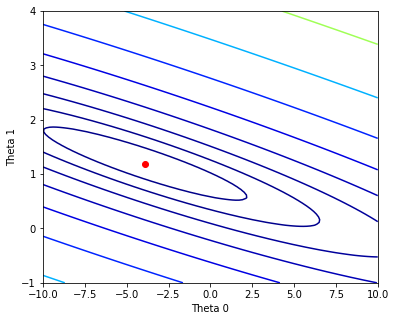

In [12]:
' Prepare grid interval and theta interval  '

plt.close('all')

interval_0 = np.linspace(-10, 10, 100)
interval_1 = np.linspace(-1, 4, 100)

(t0, t1) = np.meshgrid(interval_0, interval_1, indexing='xy')

' Filling costs '
j_history = np.zeros(shape=t0.shape)

' Generating bidimensional array '
for (i, j), element in np.ndenumerate(j_history):
    theta = np.array([t0[i,j], t1[i,j]])
    j_history[i,j] = cost_function(x, y, theta)

fig1 = plt.figure(figsize=(6,5))
ax = plt.contour(t0, t1, j_history, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
plt.scatter(t[0], t[1], c='r')

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')

plt.show()

### Surface Plot

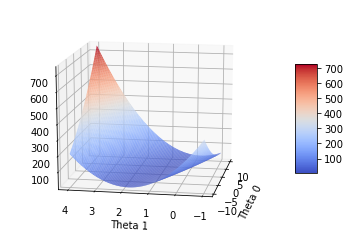

In [13]:
plt.close('all')

fig = plt.figure()
ax = fig.gca( projection='3d')

surf = ax.plot_surface(t0, t1, j_history, rstride=1, cstride=1, alpha=1, cmap=plt.cm.coolwarm)

# Customize the z axis
zmin = j_history.min()
zmax = j_history.max()

ax.set_zlim(zmin, zmax)
ax.view_init(elev=15, azim=190)

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Regression with multiple variables

In this stage of the work, we will perform Multivariate Linear Regression. For the data under study, it is necessary to perform a normalization task since the data are at different scales. Then, we will perform tasks similar to those performed in Simple Linear Regression, implementing a Gradient function capable of dealing with target data with various parameters.

Lets initialize the new sort of data.

In [15]:
data = np.genfromtxt('../../DataSets/pybk015master/ex1data2', delimiter=',')
x = data[:,[0]]
y = data[:,1]

### Feature scaling or feature normalization

Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [16]:
def standardization(x):
    mean_residual = []
    std_residual  = []
    standardization = x
    
    dimension = x.shape[1]    
    for i in range(dimension):
        mean = np.mean(x[:, i])
        std  = np.std(x[:, i])
        
        mean_residual.append(mean)
        std_residual.append(std)
        
        standardization[:, i] = (1./std)*(standardization[:, i] - mean)
        
    return standardization

The above function runs over our target data and scale all features for the same interval. Lets run it and output the first target row.

In [17]:
print(standardization(data)[0])

[ 0.13141542 -0.22609337  0.48089023]


### Cost Function

In [18]:
def cost_function(x, y, theta):
    m = y.size
    regression = x.dot(theta)
    regressionError = np.sum((regression - y)**2)
    return ((1./(2*m))*regressionError)

### Gradient Descent

In [19]:
def gradient_descent(x, y, theta, alpha, tolerance, log=False):
    m = y.size
    episilon = 0.000001
    residual = np.ones(tolerance)
    interact = 0
    converge = False
    while not converge:
        ' step 1 : Start adjusting theta values '
        hypothesis   = x.dot(theta)
        error        = hypothesis - y
        gradient     = (1./m) * (alpha) * (x.T.dot(error))
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' step 2: Run the cost function over the data with new theta '
        residual[interact] = cost_function(x, y, theta)
        
        if interact % 100 == 0 and log:
            ' The main idea here is to minimize the error value when evaluating the hypothesis '
            print('Error ' + str(residual[interact]))
        
        ' step 3 : Verify convergence over the given episilon and residual given step, also verify tolerance tries '
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        if (interact + 1) == tolerance:
            print('Caution! GD has reached the tolerance. Results may not converge.')
            converge = True
            
        interact = interact + 1
        
    return theta, residual, interact

In [20]:
data = standardization(data)

x = data[:, :2]
y = data[:, [2]]
y = y[:,0]

x = np.insert(x, 0, np.ones(x.shape[0]), axis=1)

theta = np.array([0., 0., 0.])

(t,r,i) = gradient_descent(x, y, theta, 0.01, 4000)

print('Last interaction was ' + str(i)  + ' and the output for θ is: ')
print(t) 

Last interaction was 1745 and the output for θ is: 
[ -5.53103662e-17   8.84552670e-01  -5.29655019e-02]


This time, our Gradient Descent has converged and stoped before interaction counter reaches the tolerance limit. Lets visualize the error rate behavior while performing the task and make sure it deacrases until the max interaction.

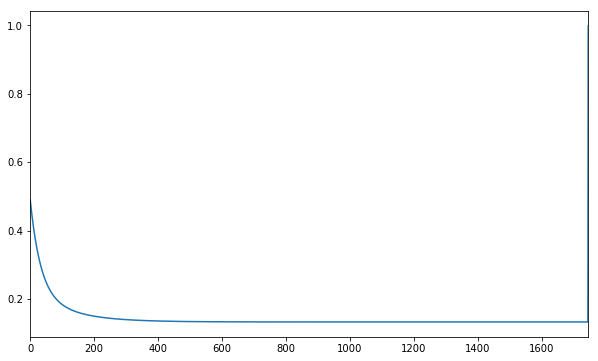

In [21]:
plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(r)

plt.show()

## Logistic Regression

In [22]:
data = np.genfromtxt('../../DataSets/pybk015master/ex2data1.txt', delimiter=',')

admitted = data[(data[:,2]==1)]
notadmitted = data[(data[:,2]==0)]

theta = np.array([0., 0., 0.])

### Data Visualization

A linear decision boundary can bee seen from the below plot. However, it is possible to verify that there is a slight slope, the line curves a bit, that prevents us from using the linear regression model to elaborate the model.

The first step to output our model is to implement the sigmoid function.

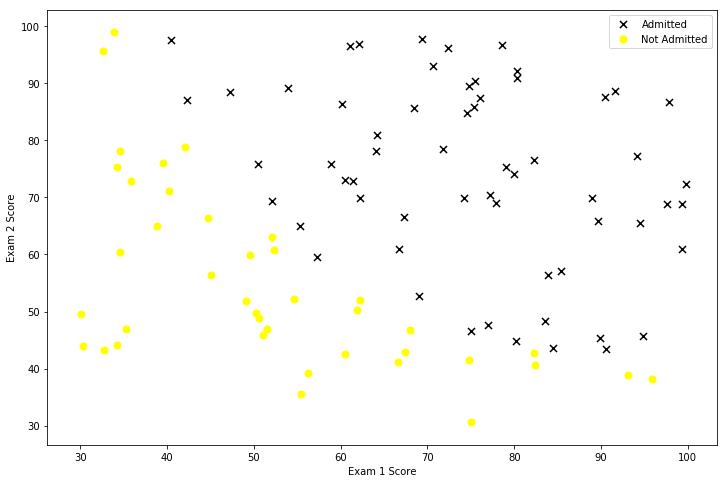

In [23]:
plt.close('all')

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(admitted[:, 0], admitted[:,1], s=50, c='black', marker='x', label='Admitted')  
ax.scatter(notadmitted[:, 0], notadmitted[:,1], s=50, c='yellow', marker='o', label='Not Admitted')  

ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')

plt.show()

### Sigmoid Function

The Sigmoid Function converts a continuous input into a value between zero and one. It helps us to work in the LOG domain when performing the Cost Function and Gradient Descent.

In [24]:
def sigmoid_function(z):  
    return 1 / (1 + np.exp(-z))

### Cost Function

The implementation of the cost function has changed somewhat. The important thing to be noticed here, besides the use of the sigmoid function, is the control in not keeping zeros in vectors that will be operated by the LOG function.

In [25]:
data = np.genfromtxt('../../DataSets/pybk015master/ex2data1.txt', delimiter=',')

' Insert ones on the data '
data = np.insert(data, 0, np.ones(data.shape[0]), axis=1)

' Slice arrays '
x = data[:, :3]
y = data[:, [3]]
y = y[:, 0]

theta = np.array([0., 0., 0.])

In [26]:
def cost_function(theta, x, y):  
    
    m = len(x)
    zero = 0.000001
    
    param = (x.dot(theta))
    hyphotesis = sigmoid_function(param)
    hyphotesis[hyphotesis == 0] = zero
    
    interval = 1 - hyphotesis
    interval[interval == 0] = zero
    
    y1 = y * np.log(hyphotesis)
    y0 = (1 - y) * np.log(interval)
    
    cost     = (-1./m) * np.sum(y1 + y0)
    
    return cost

We have the expected output in order to test our cost function. The output must be a number near to 0.6931

In [27]:
print(cost_function(theta, x, y))

0.69314718056


### Gradient Descent

In [28]:
def gradient_descent(x, y, theta, alpha, tolerance, log=False):
    m = y.size
    episilon = 0.000001
    zero     = 0.000001
    residual = np.ones(tolerance)
    J        = np.zeros(tolerance)
    interact = 0
    converge = False
    
    while not converge:
        
        ' Start adjusting theta values '
        hypothesis = sigmoid_function(x.dot(theta))
        error = hypothesis - y
        
        error[error == 0] = zero
        
        gradient = (1./m) * alpha * (x.T.dot(error))
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' Run the cost function over the data with new theta '
        J[interact] = cost_function(x, y, theta)
        
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        residual[interact] = step
        
        if interact % 100 == 0 and log:
            ' The main idea here is to minimize the error value when evaluating the hypothesis '
            print('Interaction ' + str(interact) + ', Redidual error output :' + str(J[interact]) + ', Step size: ' + str(step))
        
        if (interact + 1) == tolerance:
            print('Caution! The routine has reached the maximum tolerance! Results may not converge.')
            converge = True
            
        interact = interact + 1
        
    return theta, J, interact, residual

### Prediction Function

In [29]:
def predict(target, theta):
    
    m = target.shape[0]
    p = np.zeros(m)
    
    param = target.dot(theta)

    h = sigmoid_function(param)

    for i in range(h.shape[0]):
        if h[i] > 0.5:
            p[i] = 1
        else:
            p[i] = 0

    return p

### Testing values for α



#####  α = 0.001

Caution! The routine has reached the maximum tolerance! Results may not converge.
Iteraction reached : 6000
Theta : [-0.40825205  0.01326654  0.00362865]


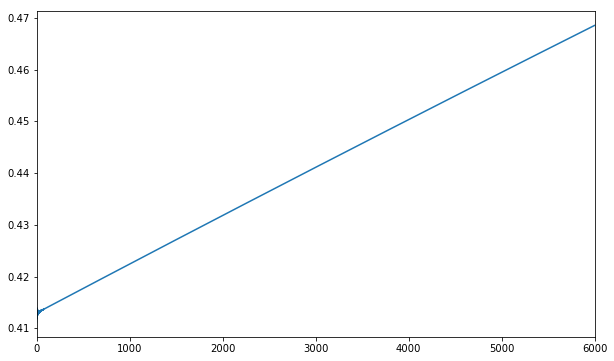

In [30]:
(t, j, i, r) = gradient_descent(x, y, theta, 0.001, 6000)

print('Iteraction reached : ' + str(i))
print('Theta : ' + str(t))

' Verify error rate behavior '

plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(j)

plt.show()

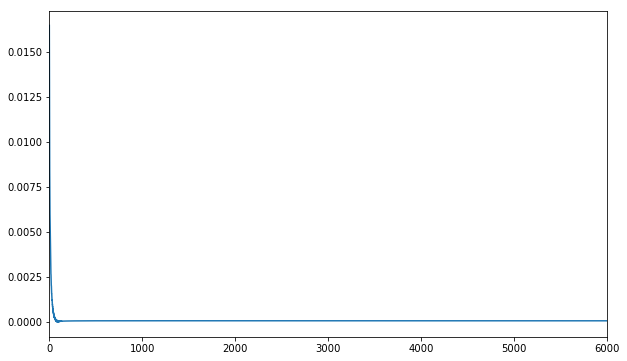

In [31]:
' Verify step rate behavior '

plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(r)

plt.show()

The above figure allows us to note that the value of the step given by theta does not change over the iterations until the execution tolerance is reached and the operation aborted. Therefore, there is no convergence for this alpha value.

#####  α = 0.002

Iteraction reached : 3685
Theta : [-0.54657162  0.0110459  -0.00522385]


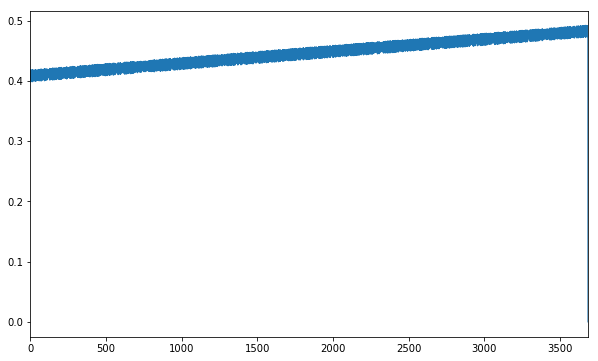

In [32]:
(t, j, i, r) = gradient_descent(x, y, theta, 0.002, 6000)

print('Iteraction reached : ' + str(i))
print('Theta : ' + str(t))

' Verify error rate behavior '

plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(j)

plt.show()

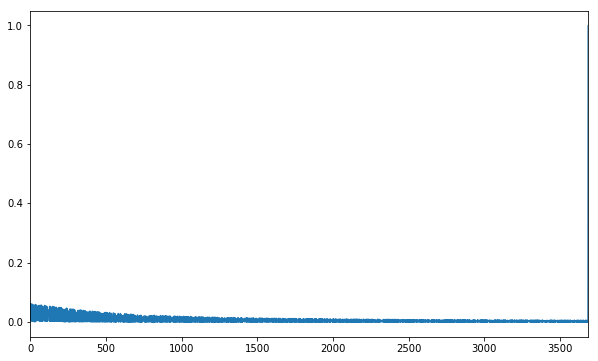

In [33]:
' Verify step rate behavior '

plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(r)

plt.show()

The above figure allows us to note that the value of the step given by theta undergoes small variations until it reaches a variation lower than what we defined as zero. Therefore, the value set for alpha guides the Gradient function to convergence.

#####  α = 0.003

Caution! The routine has reached the maximum tolerance! Results may not converge.
Iteraction reached : 6000
Theta : [-1.36272301  0.14946863  0.06518017]


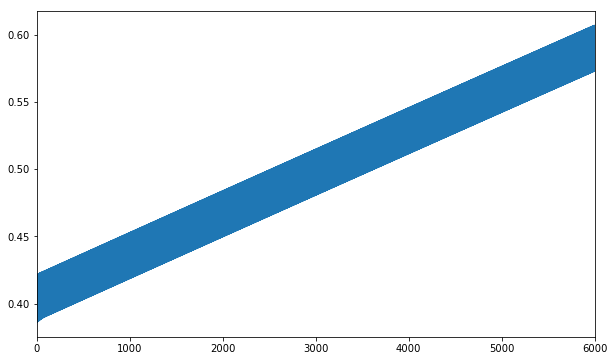

In [34]:
(t, j, i, r) = gradient_descent(x, y, theta, 0.003, 6000)

print('Iteraction reached : ' + str(i))
print('Theta : ' + str(t))

' Verify error rate behavior '

plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(j)

plt.show()

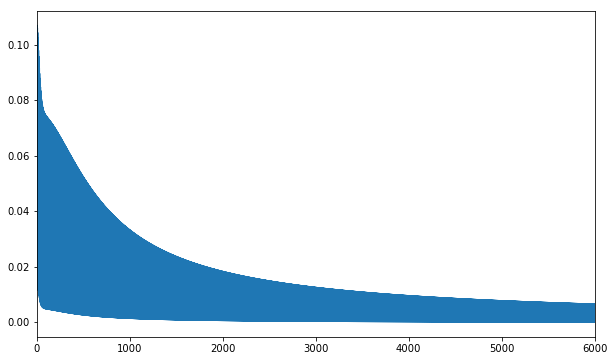

In [35]:
' Verify step rate behavior '

plt.close('all')

plt.figure(figsize=(10,6))

axes = plt.gca()
axes.set_xlim([0,i])

plt.plot(r)

plt.show()

The figure above illustrates the wide variation between the steps given by theta until the tolerance of the Gradient function is reached. Such a value for alpha may result in convergence for a greater number of interactions, but in our case study, within the 6000 that have been established, the value presented for alpha is not a good option.

### How to use the model and perform a prediction

Let's test our model for a student who has taken 45 and 85 on the first grades of the assessments. The template should indicate that it is approved.

The procedure is similar to that done previously. Let us operate the values according to the theta values obtained.

In [36]:
(t, j, i, r) = gradient_descent(x, y, theta, 0.002, 6000)
p = predict(np.matrix([1., 85, 45]), t)
print(p)

[ 1.]


### The model accuracy

The function below will return the accuracy of our Gradient to the value of alpha 0.002

In [37]:
(t, j, i, r) = gradient_descent(x, y, theta, 0.002, 6000)
p = predict(x, t)  
print((y[np.where(p == y)].size / float(y.size)) * 100.0)

54.0


### Can we improve the accuracy of the model?

To find the minimum cost function you need to set a good value for alpha. However, numerous tests are required until a value that implies the Gradient convergence is obtained.

One way to choose the best parameters and best the accuracy of the model is to use an embedded function called fmin_bfgs to find the best theta parameters for the logistic regression cost function.